In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
day=pd.read_csv(r'day.csv')
day.shape

(730, 16)

In [3]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Dropping unwanted columns
day=day.drop(['casual','registered','dteday','instant'],1)

#### changing 'season' and 'weathersit' into meaningfull columns

In [7]:
# weather1 is Clear, Few clouds, Partly cloudy, Partly cloudy
# weather2 is Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# weather3 is Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

# As "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog" is not included the data set provided.Not possible to create
day['weathersit']=day['weathersit'].replace(1,'weather1')
day['weathersit']=day['weathersit'].replace(2,'weather2')
day['weathersit']=day['weathersit'].replace(3,'weather3')
day.shape

(730, 12)

In [8]:
day['season']=day['season'].replace(1,'spring')
day['season']=day['season'].replace(2,'summer')
day['season']=day['season'].replace(3,'fall')
day['season']=day['season'].replace(4,'winter')

## Visualising the Data


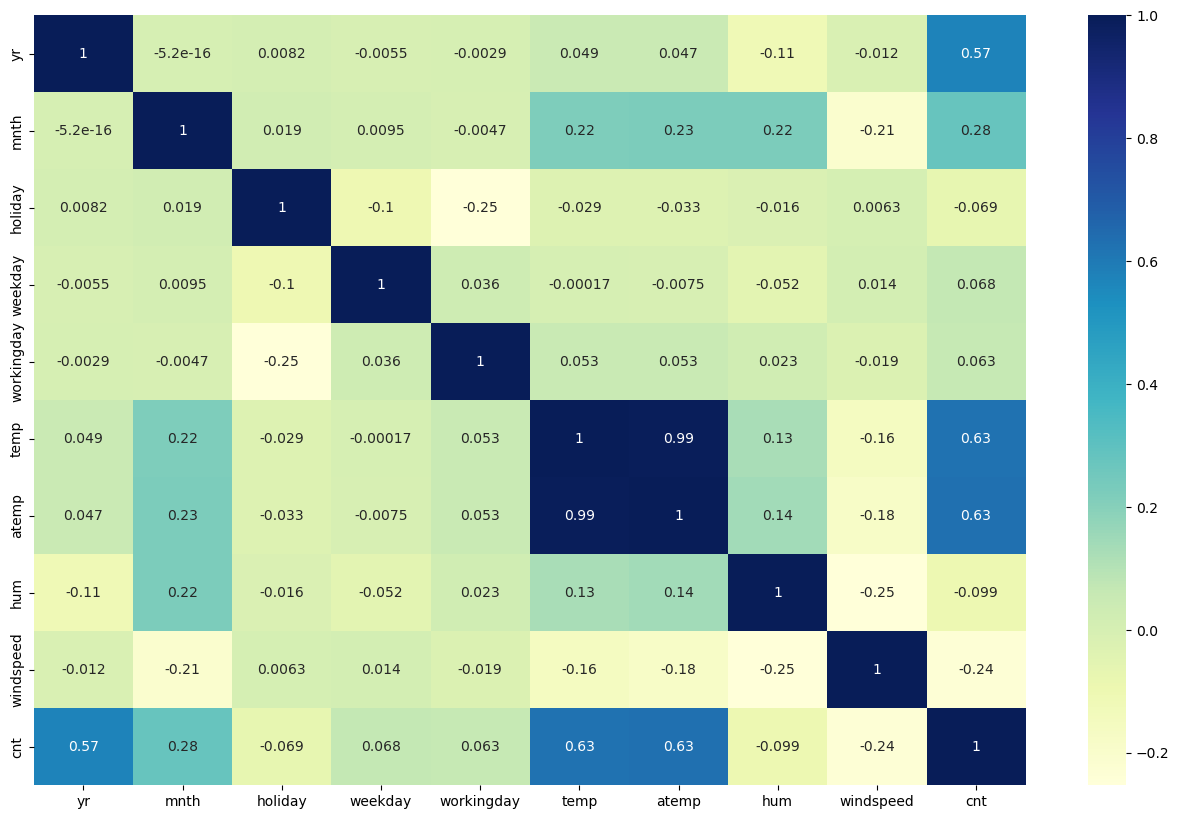

In [9]:
plt.figure(figsize = (16, 10))
sns.heatmap(day.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [10]:
### As there is a high correlation between 'temp' and 'atemp' column droping the 'temp'
### High correlation between 'mnth' and 'season' columns droping 'mnth'
day=day.drop(['temp','mnth'],1)

#### Visualising categorical data

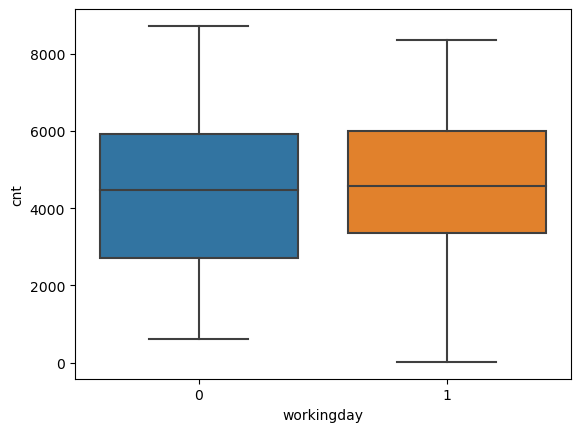

In [11]:
sns.boxplot(x='workingday',y='cnt',data=day)
plt.show()

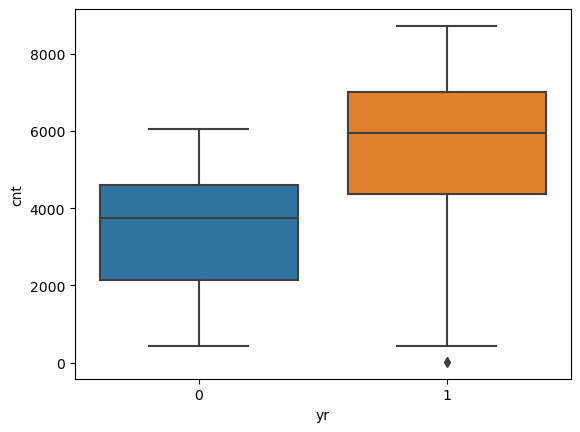

In [12]:
# Here 0 - 2018, 1 - 2019
sns.boxplot(x='yr',y='cnt',data=day)
plt.show()

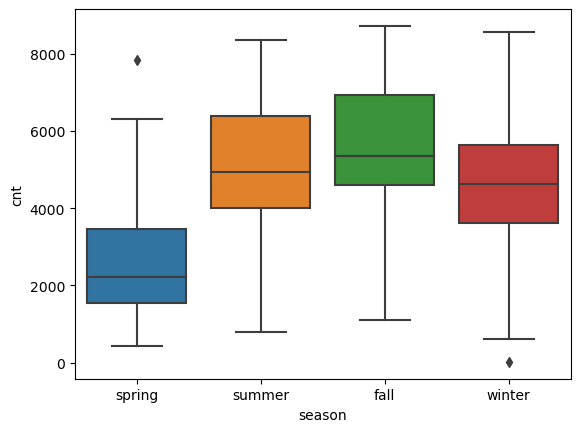

In [13]:
sns.boxplot(x='season',y='cnt',data=day)
plt.show()

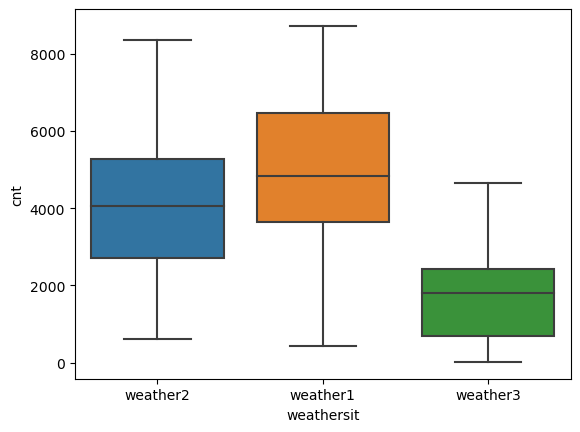

In [14]:
sns.boxplot(x='weathersit',y='cnt',data=day)
plt.show()

#### Visualising Numerical Variables

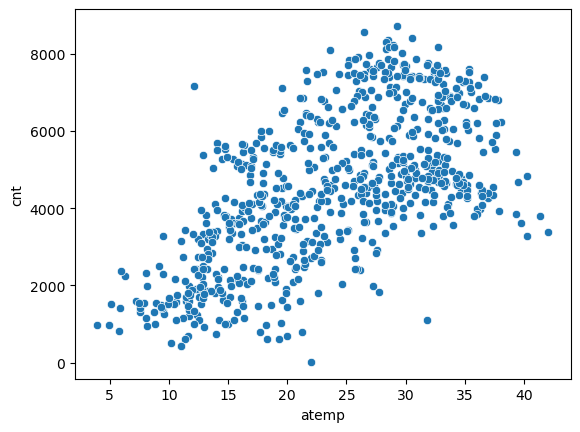

In [15]:
sns.scatterplot(x='atemp',y='cnt',data=day)
plt.show()

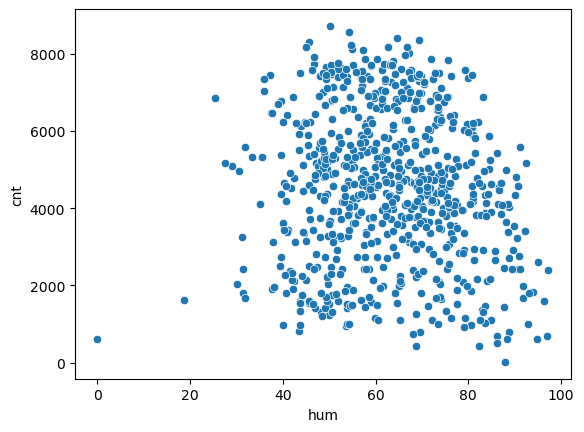

In [16]:
sns.scatterplot(x='hum',y='cnt',data=day)
plt.show()

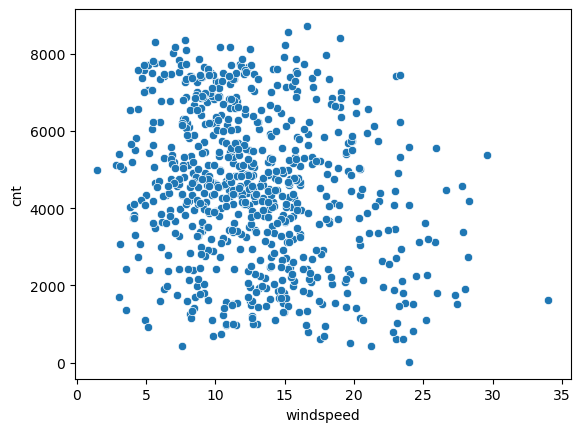

In [17]:
sns.scatterplot(x='windspeed',y='cnt',data=day)
plt.show()

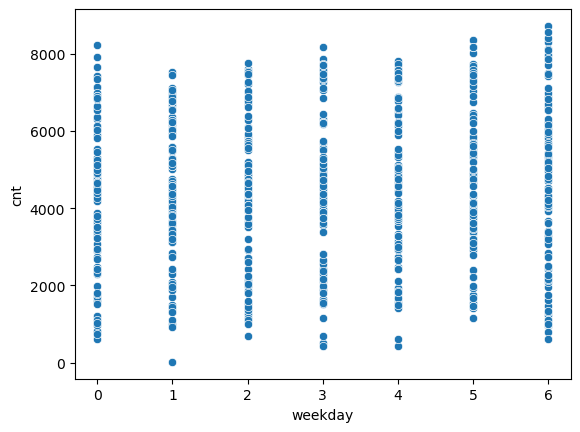

In [18]:
# Here 0 - Sunday, 1 - Monday, 2 - Tuesday, 3 - Wednesday, 4 - Thursday, 5 - Friday, 6 - Saturday

sns.scatterplot(x='weekday',y='cnt',data=day)
plt.show()

### EDA observations
#### Year 2019 has more demand than Year 2018
#### Summer and Fall has more demand, winter and spring has less demand
#### As Weather3 has very less demand
#### As the temperature increases demand for BoomBikes increases
#### Humidity between 40-80 has more demand
#### Demand increases when windspeed is between 5 to 20

In [19]:
day.head()

,season,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,0,6,0,weather2,18.18125,80.5833,10.749882,985
1,spring,0,0,0,0,weather2,17.68695,69.6087,16.652113,801
2,spring,0,0,1,1,weather1,9.47025,43.7273,16.636703,1349
3,spring,0,0,2,1,weather1,10.60610,59.0435,10.739832,1562
4,spring,0,0,3,1,weather1,11.46350,43.6957,12.522300,1600


## Creating Dummy Variables

In [20]:
d1=pd.get_dummies(day['season'],drop_first = True)
d2=pd.get_dummies(day['weathersit'],drop_first = True)

In [21]:
day=day.drop(['weathersit','season'],axis=1)

In [22]:
day=pd.concat([day,d1,d2],axis=1)

In [23]:
day.head()


,yr,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,weather2,weather3
0,0,0,6,0,18.18125,80.5833,10.749882,985,1,0,0,1,0
1,0,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,1,0
2,0,0,1,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,0,2,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,0,3,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0


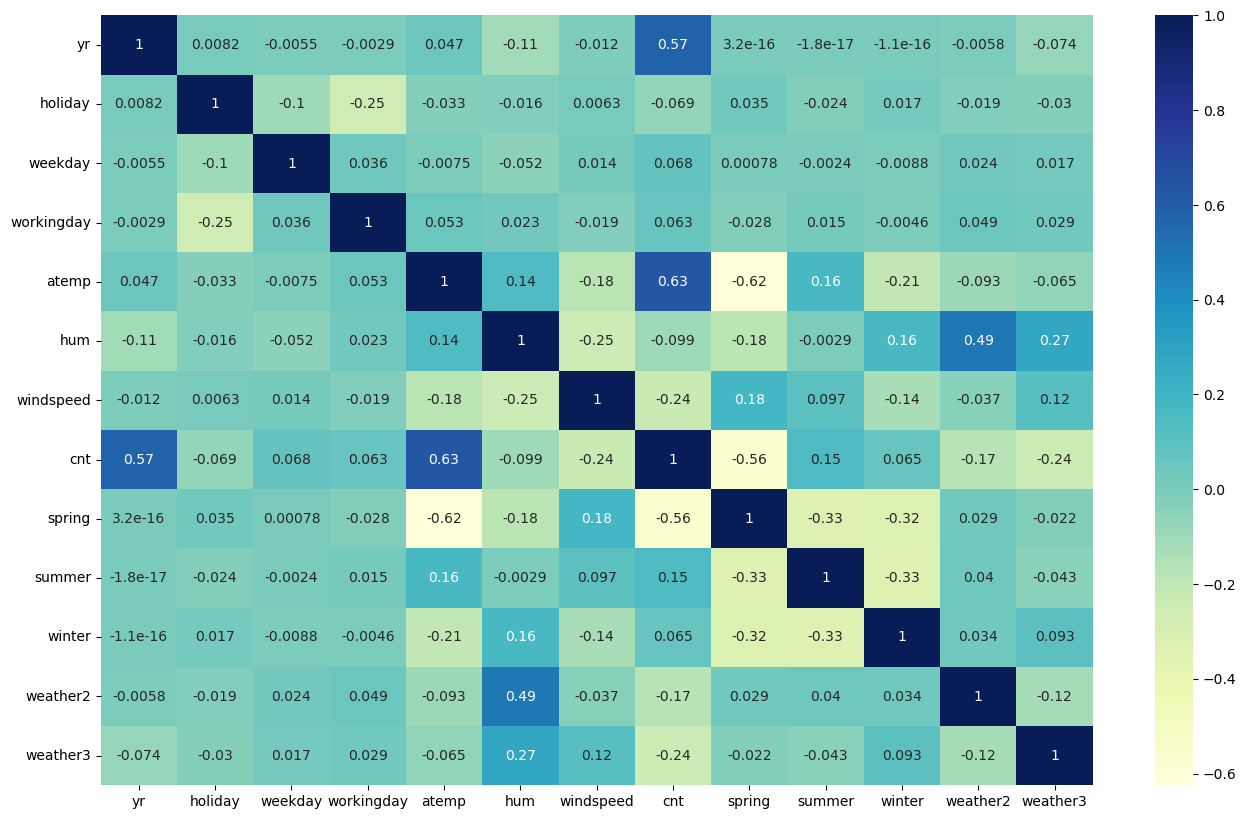

In [24]:
plt.figure(figsize = (16, 10))
sns.heatmap(day.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Splitting the data into Training and Testing Sets

In [25]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
day_train, day_test = train_test_split(day, train_size = 0.70, test_size = 0.30, random_state = 100)

In [26]:
day_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   weekday     510 non-null    int64  
 3   workingday  510 non-null    int64  
 4   atemp       510 non-null    float64
 5   hum         510 non-null    float64
 6   windspeed   510 non-null    float64
 7   cnt         510 non-null    int64  
 8   spring      510 non-null    uint8  
 9   summer      510 non-null    uint8  
 10  winter      510 non-null    uint8  
 11  weather2    510 non-null    uint8  
 12  weather3    510 non-null    uint8  
dtypes: float64(3), int64(5), uint8(5)
memory usage: 38.3 KB


###  Rescaling the features

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
num_vars = ['weekday','atemp','hum','windspeed','cnt']

day_train[num_vars] = scaler.fit_transform(day_train[num_vars])

In [30]:
day_train.head()

,yr,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,weather2,weather3
653,1,0,0.333333,1,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0
576,1,0,0.333333,1,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0
426,1,0,1.000000,0,0.438975,0.640189,0.255342,0.465255,1,0,0,1,0
728,1,0,0.000000,0,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0
482,1,0,1.000000,0,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0


In [31]:
day_train.describe()

,yr,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,weather2,weather3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,0.025490,0.498366,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.343137,0.029412
std,0.500429,0.157763,0.336182,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.166667,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.000000,0.500000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,0.000000,0.833333,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [32]:
y_train = day_train.pop('cnt')
X_train = day_train

# Building a linear model by adding all the variables

In [33]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const         0.263376
yr            0.233331
holiday      -0.060330
weekday       0.050973
workingday    0.019009
atemp         0.492384
hum          -0.122218
windspeed    -0.161567
spring       -0.095284
summer        0.028809
winter        0.070205
weather2     -0.059444
weather3     -0.245827
dtype: float64

In [34]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     202.7
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          1.20e-182
Time:                        15:08:30   Log-Likelihood:                 490.85
No. Observations:                 510   AIC:                            -955.7
Df Residuals:                     497   BIC:                            -900.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2634      0.037      7.208      0.0

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,hum,27.04
4,atemp,15.23
6,windspeed,4.55
7,spring,3.67
3,workingday,3.19
2,weekday,3.09
9,winter,2.91
10,weather2,2.28
8,summer,2.19
0,yr,2.07


In [37]:
# Dropping column 'hum' because of high VIF and updating the Model
X = X_train.drop('hum', 1)

In [38]:
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [39]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.4
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          9.84e-182
Time:                        15:08:30   Log-Likelihood:                 485.89
No. Observations:                 510   AIC:                            -947.8
Df Residuals:                     498   BIC:                            -897.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1992      0.030      6.534      0.0

In [40]:
# Droping 'summer' column because of high p-value
X = X.drop('summer', 1)

In [41]:


X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [42]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     236.5
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          3.50e-182
Time:                        15:08:30   Log-Likelihood:                 484.12
No. Observations:                 510   AIC:                            -946.2
Df Residuals:                     499   BIC:                            -899.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2289      0.026      8.789      0.0

In [43]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,atemp,5.17
5,windspeed,3.96
3,workingday,3.08
2,weekday,3.05
0,yr,2.05
6,spring,1.82
8,weather2,1.52
7,winter,1.43
1,holiday,1.09
9,weather3,1.08


#### Even though the 'atemp' has VIF>5, but the 'atemp' has more correlation with 'cnt'. So we are not dropping the 'atemp' column

## Residual Analysis of the train data

In [44]:
y_train_cnt = lr_3.predict(X_train_lm)

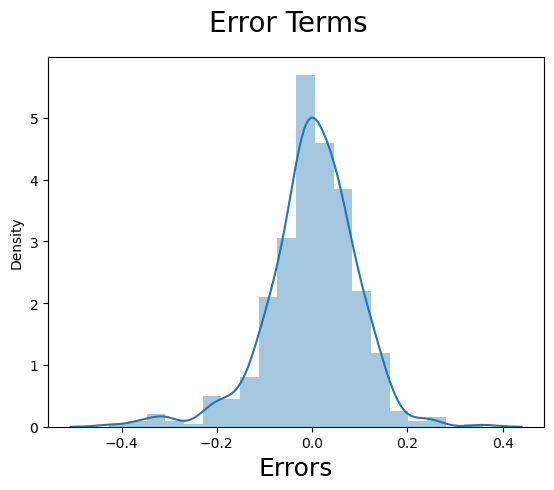

In [45]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  
plt.show()

## Making Predictions Using the Final Model

#### Applying the scaling on the test sets

In [46]:
num_vars = ['weekday','atemp','hum','windspeed','cnt']

day_test[num_vars] = scaler.transform(day_test[num_vars])

In [47]:
day_test.describe()

,yr,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,weather2,weather3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.503044,0.698630,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.319635,0.027397
std,0.500722,0.188034,0.331402,0.459904,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.166667,0.000000,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.500000,1.000000,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.833333,1.000000,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test, y_test

In [48]:
y_test = day_test.pop('cnt')
X_test = day_test

In [49]:
# Adding constant variable to test dataframe
X_test_m3 = sm.add_constant(X_test)

In [50]:
X_test_m3 = X_test_m3.drop(["hum",'summer'], axis = 1)

In [51]:
y_pred_m3 = lr_3.predict(X_test_m3)

In [52]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     236.5
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          3.50e-182
Time:                        15:08:30   Log-Likelihood:                 484.12
No. Observations:                 510   AIC:                            -946.2
Df Residuals:                     499   BIC:                            -899.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2289      0.026      8.789      0.0

## Model Evaluation

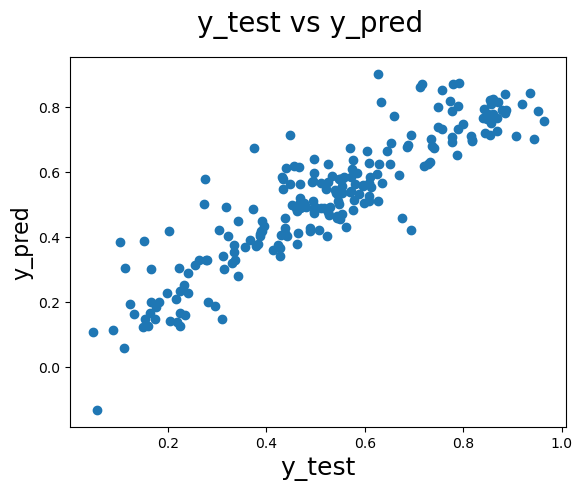

In [54]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m3)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [55]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m3)

0.8072435123217028

#### Final linear Model equation would be
cnt= 0.2367 x yr - 0.0620 x holiday + 0.0536 x weekday + 0.0194 x workinday + 0.4365 x atemp - 0.1322 x windspeed - 0.1248 x spring + 0.0418 x winter - 0.0790 x weather2 - 0.2822 x weather3

# Building Linear Model with RFE (Recursive feature elimination)

In [56]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [57]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=12)    
rfe = rfe.fit(X_train, y_train)

In [58]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('weather2', True, 1),
 ('weather3', True, 1)]

In [59]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'weekday', 'workingday', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'weather2', 'weather3'],
      dtype='object')

In [60]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

### Building model using statsmodel, for the detailed statistics

In [61]:
X_train_rfe = X_train[col]

In [62]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [63]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [64]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     202.7
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          1.20e-182
Time:                        15:08:58   Log-Likelihood:                 490.85
No. Observations:                 510   AIC:                            -955.7
Df Residuals:                     497   BIC:                            -900.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2634      0.037      7.208      0.0

In [65]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,77.69
8,spring,4.16
5,atemp,3.24
10,winter,2.82
9,summer,1.94
6,hum,1.89
11,weather2,1.58
12,weather3,1.25
7,windspeed,1.20
2,holiday,1.08


In [66]:
#dropping 'const' because of high VIF
X_train_new = X_train_rfe.drop(["const"], axis = 1)

In [67]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,hum,27.04
4,atemp,15.23
6,windspeed,4.55
7,spring,3.67
3,workingday,3.19
2,weekday,3.09
9,winter,2.91
10,weather2,2.28
8,summer,2.19
0,yr,2.07


In [68]:
#dropping 'hum' column because of high VIF
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [69]:
X_train_lm = sm.add_constant(X_train_new)

In [70]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [71]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.4
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          9.84e-182
Time:                        15:09:01   Log-Likelihood:                 485.89
No. Observations:                 510   AIC:                            -947.8
Df Residuals:                     498   BIC:                            -897.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1992      0.030      6.534      0.0

In [72]:
#dropping 'summer' column because of high p-value
X_train_new = X_train_new.drop(["summer"], axis = 1)

In [73]:
X_train_lm = sm.add_constant(X_train_new)

In [74]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [75]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     236.5
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          3.50e-182
Time:                        15:09:02   Log-Likelihood:                 484.12
No. Observations:                 510   AIC:                            -946.2
Df Residuals:                     499   BIC:                            -899.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2289      0.026      8.789      0.0

In [76]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,atemp,5.17
5,windspeed,3.96
3,workingday,3.08
2,weekday,3.05
0,yr,2.05
6,spring,1.82
8,weather2,1.52
7,winter,1.43
1,holiday,1.09
9,weather3,1.08


### Residual Analysis of the train data

In [77]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

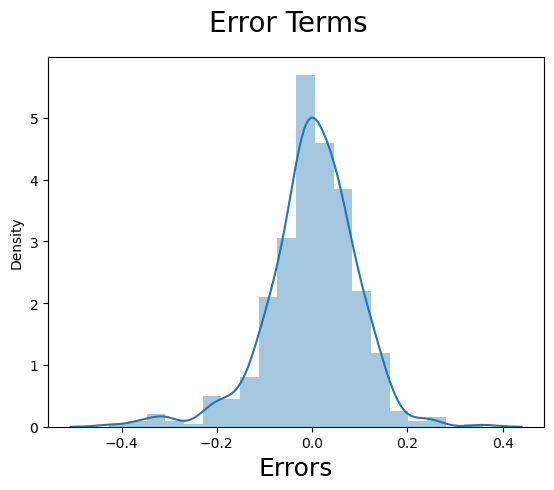

In [78]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         

### Making Predictions


In [79]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [80]:
# Making predictions
y_pred_rfe = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred_rfe')

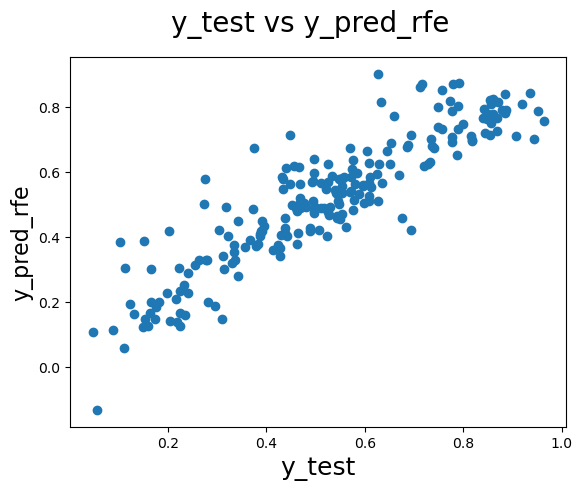

In [83]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_rfe)
fig.suptitle('y_test vs y_pred_rfe', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_rfe', fontsize=16)  

In [82]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_rfe)

0.8072435123217028

#### Final linear Model equation would be 
cnt= 0.2367 x yr - 0.0620 x holiday + 0.0536 x weekday + 0.0194 x workinday + 0.4365 x atemp - 0.1322 x windspeed - 0.1248 x spring + 0.0418 x winter - 0.0790 x weather2 - 0.2822 x weather3

## Conclusion
#### This is pretty good linear model with R-square value of 0.81, VIF values < 5.5 and p-values of independent variables < 0.05